In [1]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2

from azure.quantum import Workspace 
from azure.quantum.qiskit import AzureQuantumProvider

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.shor_code_circuit import ShorCodeCircuit
from functions import *


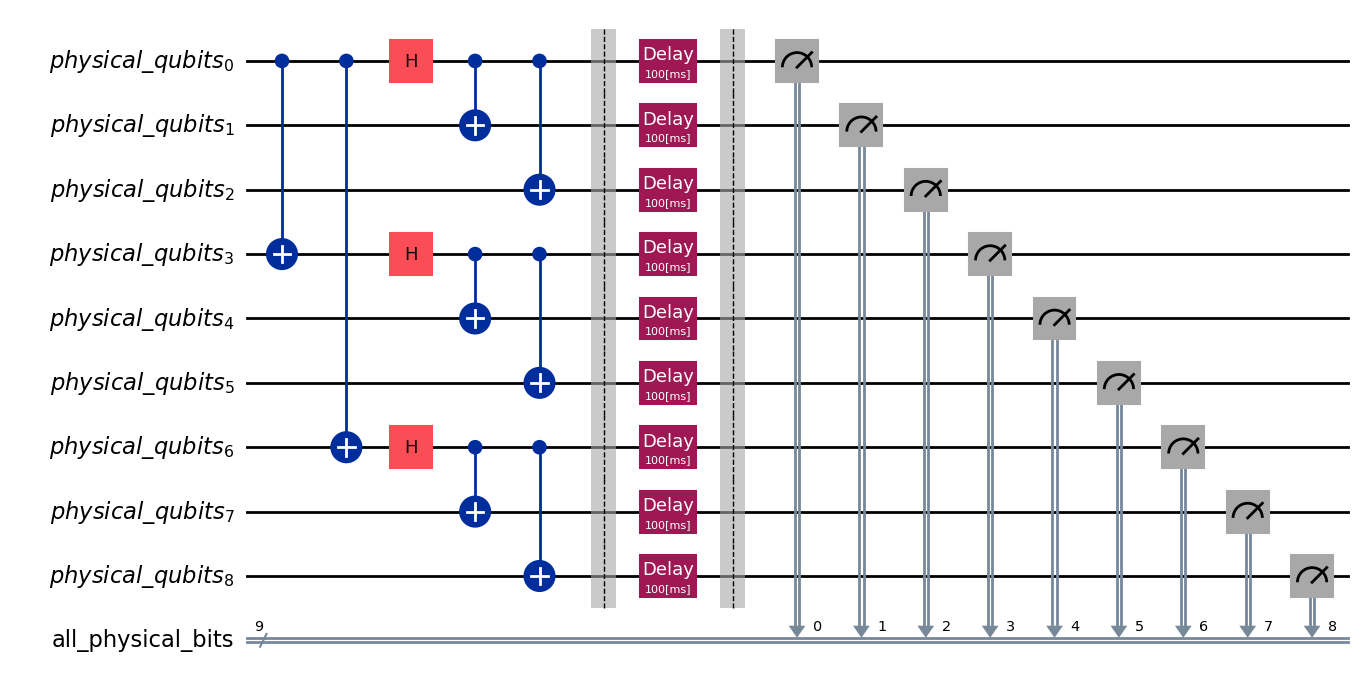

In [2]:
def load_circuit():
    qc = ShorCodeCircuit(1)

    qc.encode()
    
    qc.barrier()
    qc.delay(100, unit='ms')
    qc.barrier()

    qc.measure_all(basis='all')

    return qc

qc = load_circuit()
qc.draw_physical_circuit('mpl')

In [3]:
# IonQ access
workspace = Workspace(  
    resource_id = "", # Add the resourceID of your workspace
    location = "" # Add the location of your workspace (for example "westus")
    )

provider = AzureQuantumProvider(workspace)

In [4]:
backend_name = "ionq.qpu.aria-1"
backend_name_simulator = "ionq.simulator"
backend = provider.get_backend(backend_name)
simulator_backend = provider.get_backend(backend_name_simulator)

option_params = {
    "error-mitigation": {
        "debias": False,
        "sharpen": False
    }
}

backend.options.update_options(**option_params)
simulator_backend.options.update_options(**option_params)
simulator_backend.options.update_options(noise_model="aria-1") 


In [5]:

phy_qc = qc.physical_quantum_circuit
isa_circuit = transpile(phy_qc, backend, optimization_level=3)
print(f"Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw('mpl')


Circuit Depth: 7


In [6]:
simulation_result = sampler_simulation(qc.physical_quantum_circuit, 12800)

print(f"{simulation_result.data[qc.physical_bit_register.name].get_counts()}")
        


{'000000000': 1493, '111000111': 1619, '111111111': 1606, '000111000': 1607, '000111111': 1628, '111111000': 1594, '000000111': 1639, '111000000': 1614}


Run experiment

In [7]:
shots = 10000
# job = backend.run(isa_circuit, shots=shots)

# job_id = job.id()
# print(f"Job ID: {job_id}")

In [ ]:
results = extract_results_json_IONQ('shor_code_T1_delay100ms.json', type='percentage', reverse_order=True)

results = results[0]
print(results)

{'000000000': 11.471471471471471, '000000001': 0.13013013013013014, '000000010': 0.16016016016016016, '000000011': 0.07007007007007006, '000000100': 0.09009009009009009, '000000101': 0.20020020020020018, '000000110': 0.13013013013013014, '000000111': 11.401401401401401, '000001000': 0.11011011011011011, '000001001': 0.0, '000001010': 0.0, '000001011': 0.0, '000001100': 0.0, '000001101': 0.0, '000001110': 0.01001001001001001, '000001111': 0.050050050050050046, '000010000': 0.10010010010010009, '000010001': 0.0, '000010010': 0.02002002002002002, '000010011': 0.0, '000010100': 0.0, '000010101': 0.0, '000010110': 0.0, '000010111': 0.16016016016016016, '000011000': 0.10010010010010009, '000011001': 0.0, '000011010': 0.0, '000011011': 0.0, '000011100': 0.0, '000011101': 0.01001001001001001, '000011110': 0.0, '000011111': 0.14014014014014012, '000100000': 0.08008008008008008, '000100001': 0.0, '000100010': 0.0, '000100011': 0.0, '000100100': 0.0, '000100101': 0.0, '000100110': 0.0, '000100111

In [15]:
states = [bin(i)[2:].zfill(9) for i in range(2**9)]
valid_states = ['000000111', '111000111', '111000000', '111111000', '000111111', '111111111', '000000000', '000111000']

TVD

In [16]:
alpha = generate_uniform_distribution(9, valid_states)


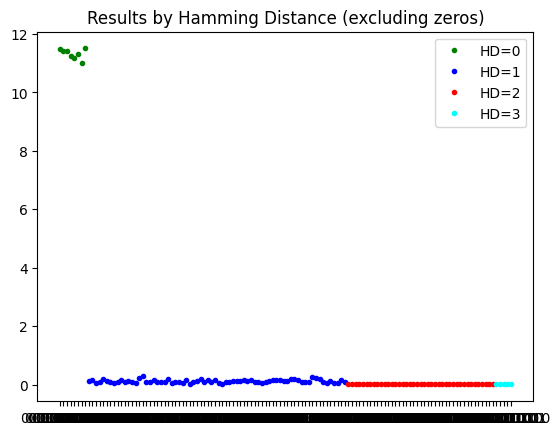

In [17]:
plot_results_hamming_distance(results, qb_len=9, valid_states=valid_states, omit_zeros=True)
# ommiting states with zero counts

In [18]:
tvd = calculate_tvd(results, alpha, percentage=True)
print(f"best TVD: {round(tvd*100,2)}%")

best TVD: 9.48%
